##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [87]:
mnist = tf.keras.datasets.california_housing
import pandas as pd
dfIrisLocal=pd.read_csv("iris.csv")
dfIrisLocal.head()
X=dfIrisLocal.drop("variety",axis=1)
y=dfIrisLocal["variety"]
y
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


je dois encoder les target de varieté pour ramener en valeur numerique

In [77]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le=LabelEncoder()
y=le.fit_transform(y)
y_categorical=to_categorical(y)

maintenant je split les données


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 - 1s - 60ms/step - accuracy: 0.0083 - loss: 1.3367 - val_accuracy: 0.0000e+00 - val_loss: 1.2724
Epoch 2/50
15/15 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 1.2490 - val_accuracy: 0.0000e+00 - val_loss: 1.2079
Epoch 3/50
15/15 - 0s - 12ms/step - accuracy: 0.0000e+00 - loss: 1.2037 - val_accuracy: 0.0000e+00 - val_loss: 1.1768
Epoch 4/50
15/15 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: 1.1820 - val_accuracy: 0.0333 - val_loss: 1.1613
Epoch 5/50
15/15 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: 1.1669 - val_accuracy: 0.0000e+00 - val_loss: 1.1483
Epoch 6/50
15/15 - 0s - 9ms/step - accuracy: 0.0333 - loss: 1.1576 - val_accuracy: 0.0333 - val_loss: 1.1385
Epoch 7/50
15/15 - 0s - 9ms/step - accuracy: 0.0250 - loss: 1.1470 - val_accuracy: 0.0667 - val_loss: 1.1295
Epoch 8/50
15/15 - 0s - 9ms/step - accuracy: 0.0667 - loss: 1.1394 - val_accuracy: 0.0667 - val_loss: 1.1205
Epoch 9/50
15/15 - 0s - 10ms/step - accuracy: 0.1083 - loss: 1.1286 - val_accuracy: 0.2000 - v

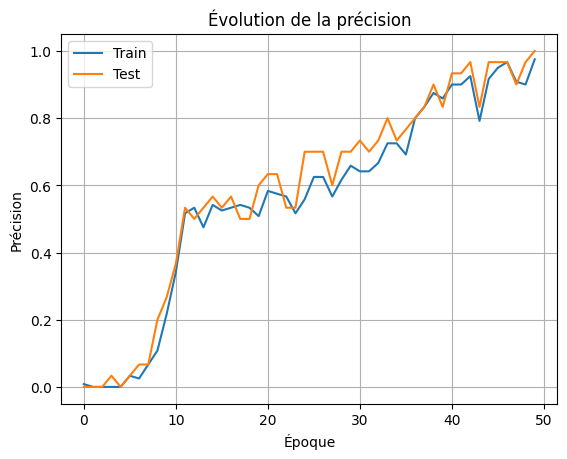

In [85]:
# ✅ 5. Construire un modèle Keras simple

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(y_categorical.shape[1], activation='softmax')  # sortie softmax pour classification
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



# ✅ 6. Entraîner le modèle

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=2
)



# ✅ 7. Évaluer le modèle

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy sur les données de test : {accuracy:.2%}")



# ✅ 8. (Optionnel) Visualiser l’apprentissage

import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Évolution de la précision")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.legend()
plt.grid()
plt.show()

FAire une prediction maintenant


In [88]:
import numpy as np

# Exemple de nouvelle fleur (les 4 features dans l'ordre du dataset iris)
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # format 2D: (1, nombre_features)

# Prédire avec le modèle entraîné
pred_probs = model.predict(new_sample)   # probabilités pour chaque classe
pred_class_index = np.argmax(pred_probs, axis=1)[0]  # index de la classe prédite

if (pred_class_index == 0):
    pred_class_name = "Iris-setosa"
elif (pred_class_index == 1):
    pred_class_name = "Iris-versicolor"
elif (pred_class_index == 2):
  pred_class_name = "Iris-viginica"

print(f"Prédiction: {pred_class_index}")
print(f"Prédiction: {pred_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prédiction: 0
Prédiction: Iris-virginia


In [26]:
df2.head()
columns_name=["MedInc","houseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]

In [57]:
df = pd.DataFrame(x_train,columns=columns_name)
df["MedHouseVal"]=y_train
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float32
 1   houseAge     16512 non-null  float32
 2   AveRooms     16512 non-null  float32
 3   AveBedrms    16512 non-null  float32
 4   Population   16512 non-null  float32
 5   AveOccup     16512 non-null  float32
 6   Latitude     16512 non-null  float32
 7   Longitude    16512 non-null  float32
 8   MedHouseVal  16512 non-null  float32
dtypes: float32(9)
memory usage: 580.6 KB


In [36]:
pip install plotly

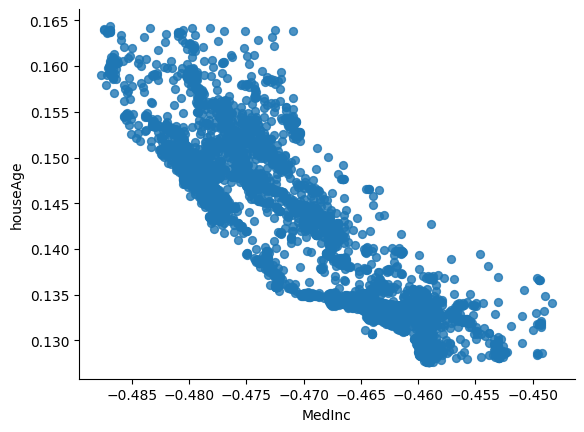

In [30]:
# @title MedInc vs houseAge

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MedInc', y='houseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

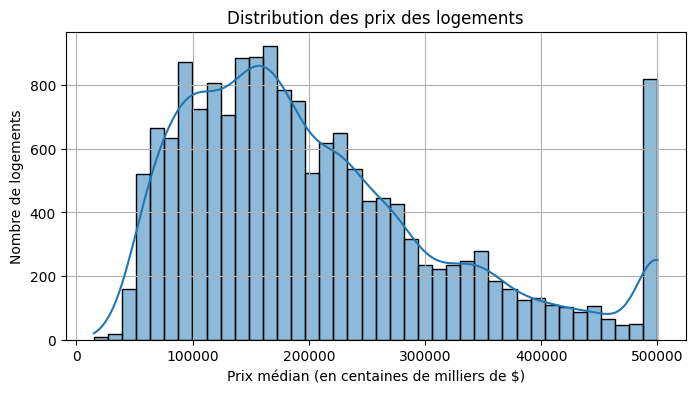

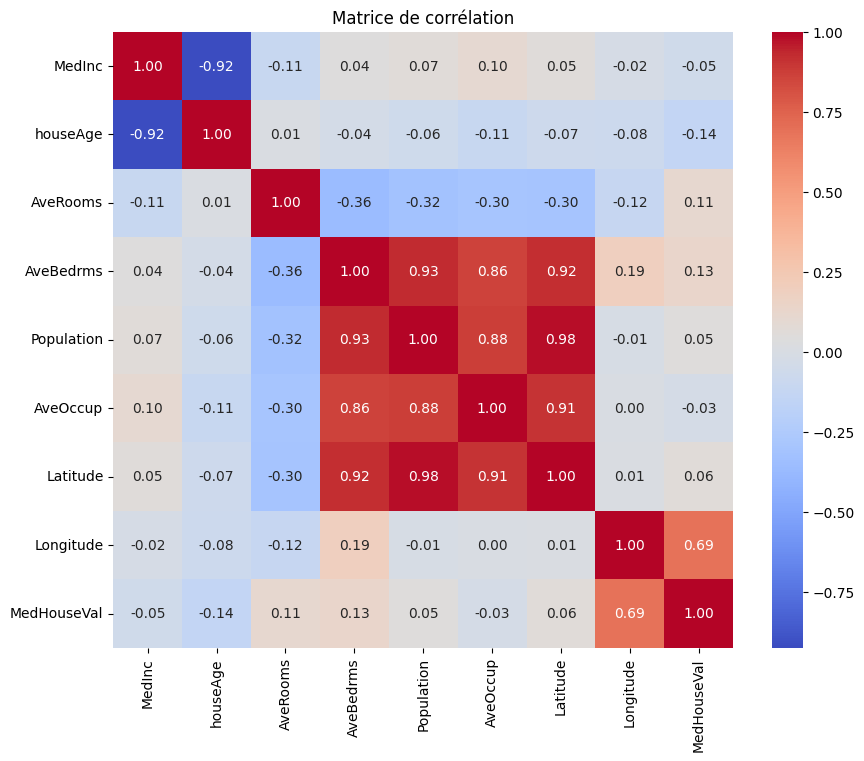

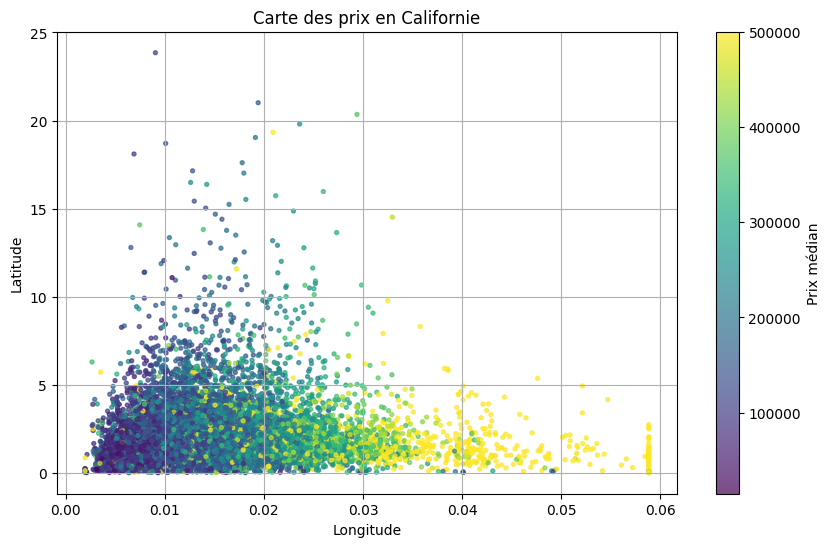

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique 1 : distribution des prix
plt.figure(figsize=(8, 4))
sns.histplot(df["MedHouseVal"], bins=40, kde=True)
plt.title("Distribution des prix des logements")
plt.xlabel("Prix médian (en centaines de milliers de $)")
plt.ylabel("Nombre de logements")
plt.grid(True)
plt.show()

# Graphique 2 : corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# Graphique 3 : carte 2D statique
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Longitude"], df["Latitude"],
                      c=df["MedHouseVal"], cmap="viridis", s=8, alpha=0.7)
plt.colorbar(scatter, label="Prix médian")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Carte des prix en Californie")
plt.grid(True)
plt.show()


## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [46]:
fig = px.scatter_3d(
    df,
    x="AveRooms", y="MedInc", z="MedHouseVal",
    color="houseAge",
    opacity=0.7,
    title="Prix des logements en 3D"
)
fig.update_traces(marker=dict(size=3))
fig.show()

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.22637008,  0.49943   ,  0.23680843, -0.17068814, -0.82995224,
        -0.7948599 , -0.08774708, -0.1305255 ,  0.08120453, -0.02950993]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.08581506, 0.17732684, 0.13637017, 0.09072895, 0.0469279 ,
        0.04860395, 0.09857498, 0.09444702, 0.11671898, 0.10448616]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [7]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(3.0240505)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8607 - loss: 0.4786
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9560 - loss: 0.1526
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9663 - loss: 0.1115
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0889
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0768


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [11]:
model.evaluate(x_test,  y_test, verbose=2)
y_test

313/313 - 0s - 1ms/step - accuracy: 0.9775 - loss: 0.0731


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [13]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.99561363e-08, 6.37854658e-09, 1.90610772e-05, 8.20104251e-05,
        5.69157256e-11, 1.56429493e-07, 1.59018913e-12, 9.99896526e-01,
        1.43415389e-06, 8.82692405e-07],
       [4.33410374e-09, 2.38541188e-03, 9.97566342e-01, 3.96423529e-05,
        4.45827904e-16, 8.01727128e-06, 3.49998714e-07, 8.16754487e-13,
        1.93389980e-07, 6.54402493e-15],
       [7.11446944e-07, 9.98266578e-01, 4.34293936e-04, 9.10461858e-06,
        6.71011512e-05, 3.66619170e-05, 5.29415956e-05, 6.55208190e-04,
        4.75546229e-04, 1.92336665e-06],
       [9.98717070e-01, 7.38334506e-07, 1.40974429e-04, 6.40949565e-07,
        8.68426298e-07, 1.03135950e-04, 8.20887450e-04, 8.52455050e-05,
        2.68729627e-06, 1.27757085e-04],
       [1.57767299e-05, 1.18768014e-07, 4.79725759e-06, 3.65292792e-08,
        9.98706579e-01, 8.76204194e-06, 8.03291368e-06, 2.06002078e-04,
        4.18027594e-05, 1.00804237e-03]], dtype=float32)>

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
